In [1]:
# 사용자 class import
from txt_to_csv import ttoc
from SPT_Scheduler_with_validation import SPT_Scheduler
import matplotlib.pyplot as plt

In [2]:
# txt파일 입력
filename = '2_500_20_월.txt'
# job 수 설정 - 생산량이 80000개면, job 개수를 80개로
C = 80
# csv저장 파일 입력
output_filename = 'ex1.csv'

In [3]:
# txt파일에서 job 수 만큼 불러와서 csv로 저장
ttoc_instance = ttoc(filename, C)
ttoc_instance.to_csv(output_filename)

In [4]:
# 초기 df 생성
df = SPT_Scheduler('ex1.csv')
# 작업을 위한 초기 list 생성
machines = df.m_tolist()

In [5]:
# SPT rule 적용
df.SPT_rule(machines)

,Job_order,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,38,2,39,19,7,51,99,74,70,96,...,64,43,83,23,1,92,45,7,83,96
1,50,3,27,34,11,15,88,84,76,51,...,42,68,28,56,98,59,41,43,69,84
2,58,3,50,66,25,86,48,74,3,65,...,81,70,80,59,72,39,84,61,53,39
3,78,4,33,62,3,18,49,51,98,39,...,92,96,14,76,72,7,41,8,27,76
4,39,7,40,48,35,88,49,15,59,56,...,40,69,22,67,77,35,1,16,14,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,65,96,82,7,35,57,25,65,91,7,...,27,48,89,49,3,86,80,42,81,26
76,19,97,80,46,67,12,99,36,48,71,...,40,45,20,10,49,79,18,85,66,69
77,32,97,27,98,66,38,73,81,17,54,...,22,5,46,85,12,24,81,31,20,40
78,25,98,14,75,73,62,2,8,63,81,...,8,31,10,64,35,85,1,12,83,13


In [6]:
# 제출할 CSV 형식에 맞게 df 생성
df.all_schedule()
# 제출한 CSV 저장
df.to_csv(output_filename='ex2.csv')

In [7]:
# CSV 오류 여부 검증
file_path = 'ex2.csv'
validation = SPT_Scheduler(file_path)
validation.check_job()
validation.check_job_sequence()
validation.check_overlap()
validation.check_processing_times()
# Makespan 생성
df.info_machines()


스케줄링에 들어있는 job:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]
job 개수: 80개
1.csv 파일 이상 없음
2.작업 순서 적합
3.작업 겹침 없음
4.프로세싱 타임 적합
Makespan:  6352


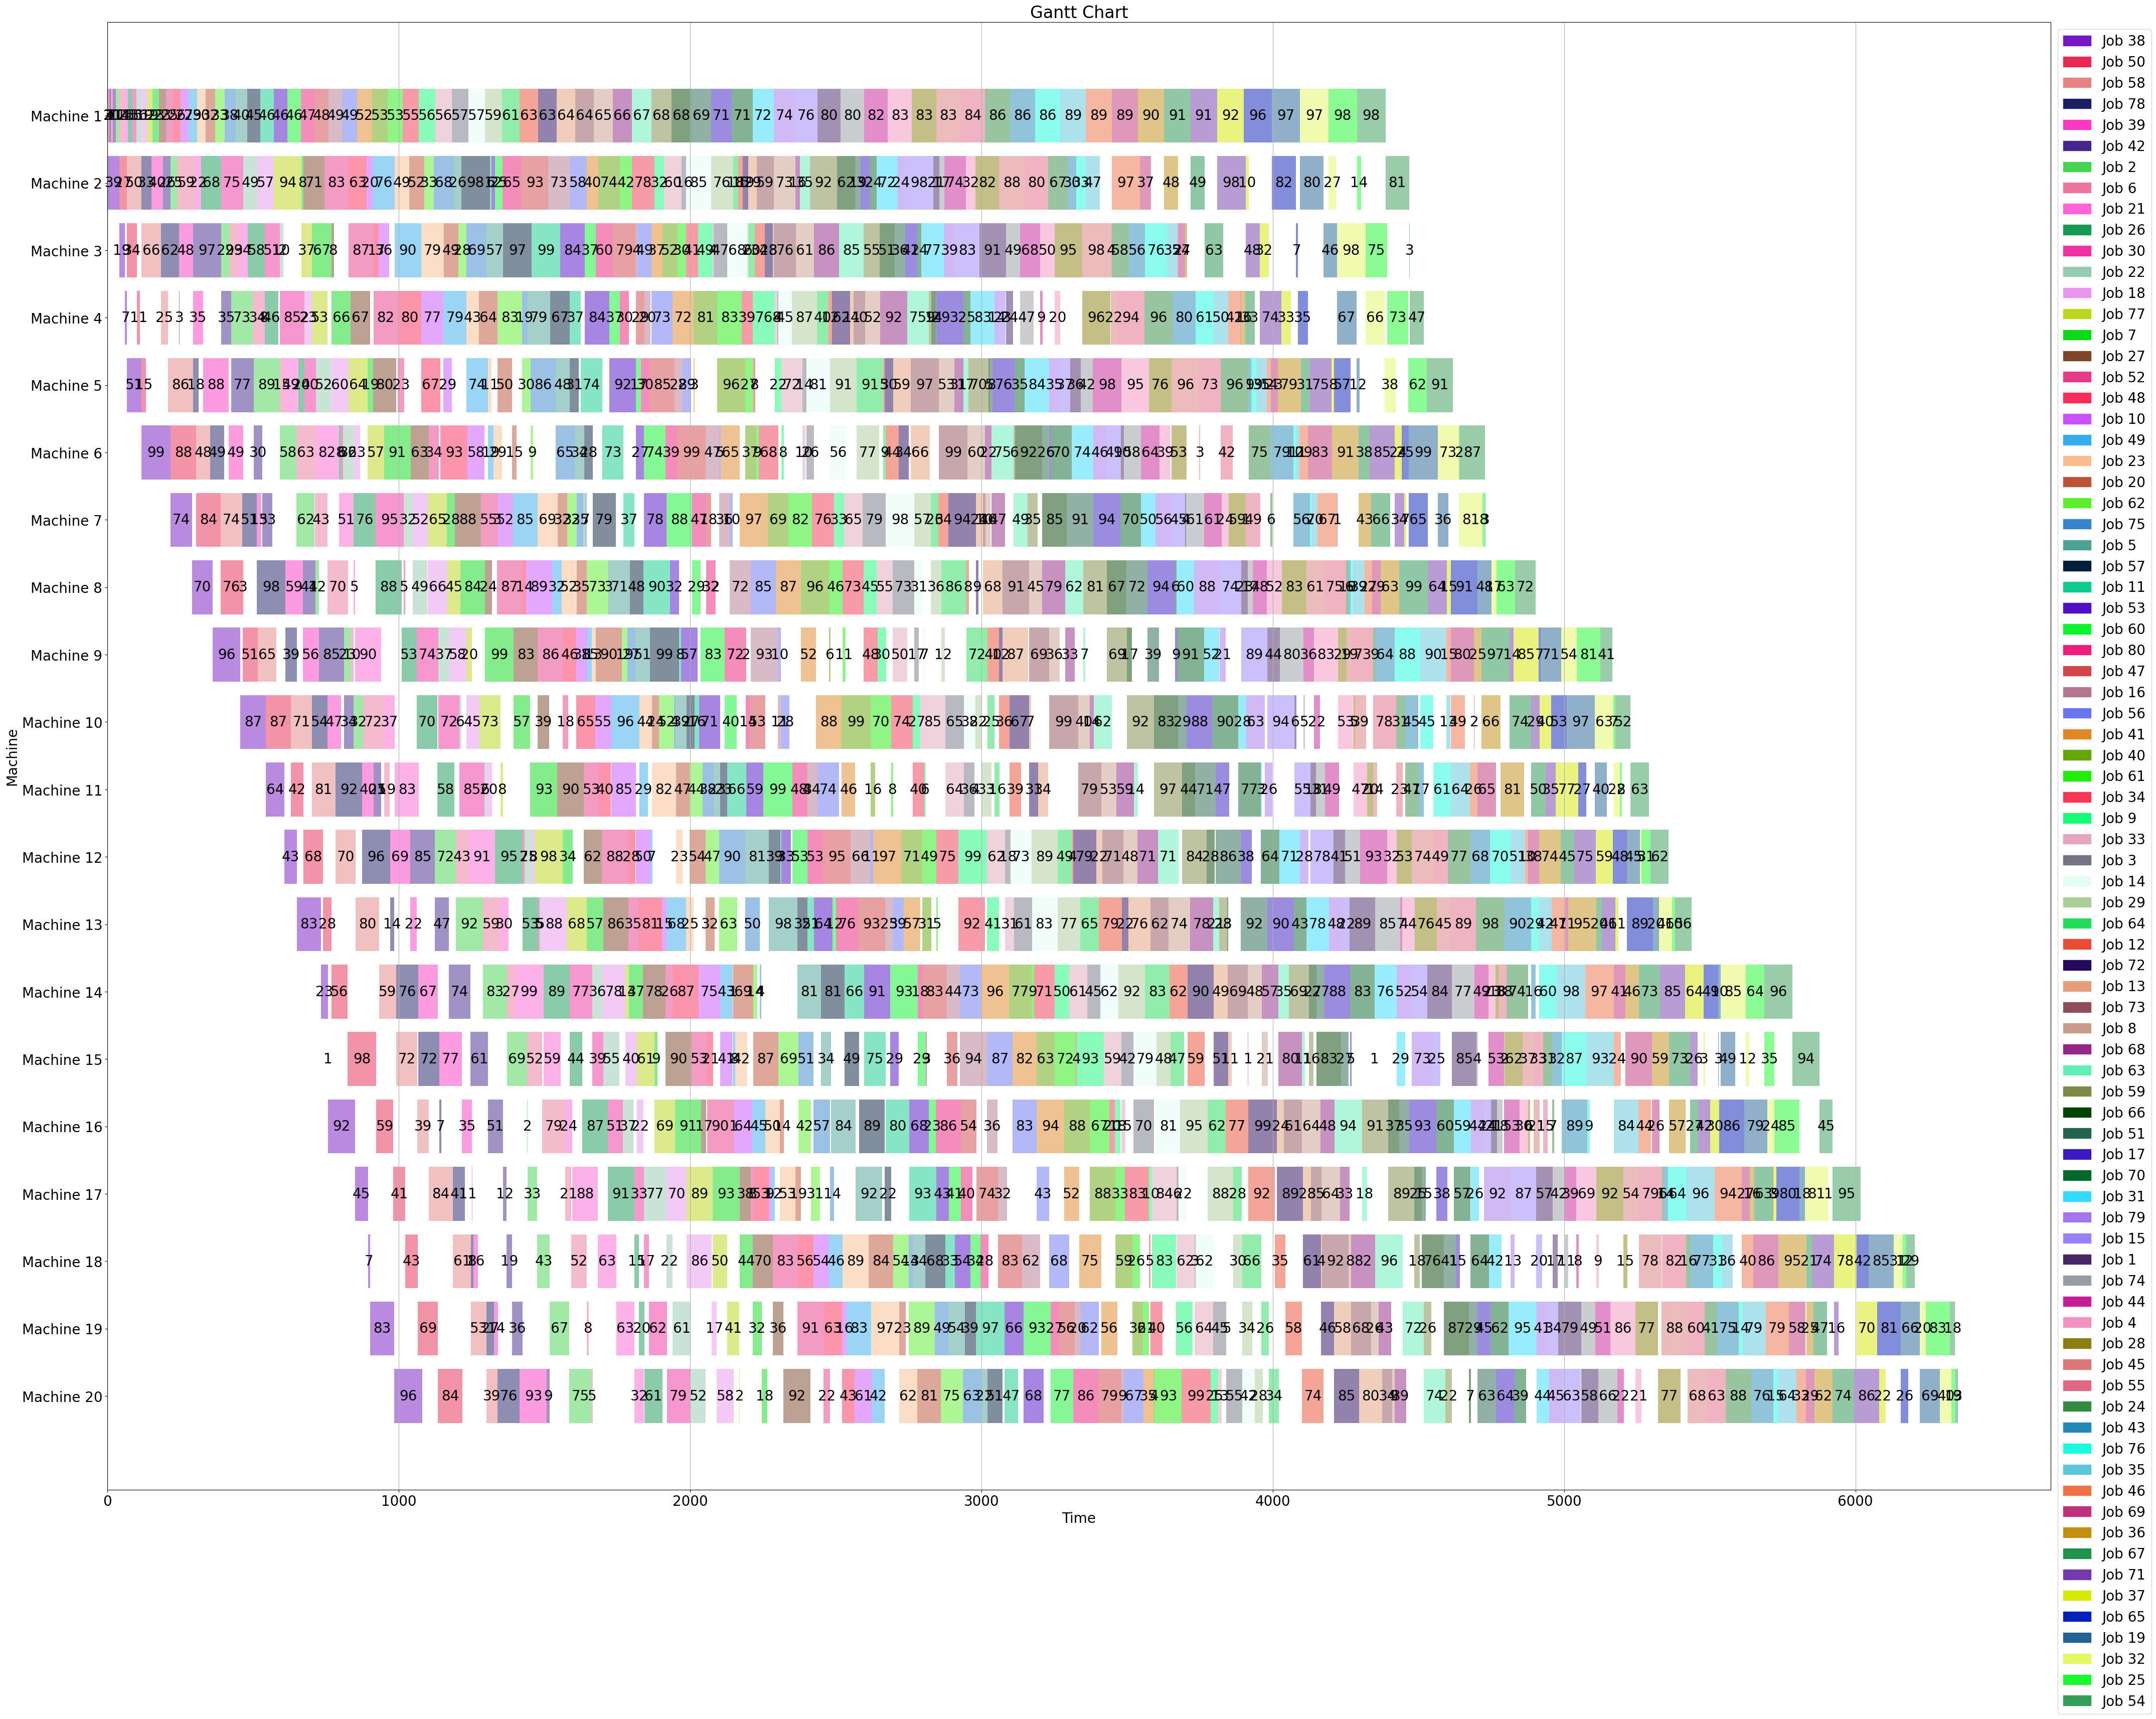

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [8]:

# Ganttchart 생성 및 저장
plt.rcParams.update({'font.size': 20})
df.plot_gantt_chart()

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

class GeneticAlgorithmScheduler:
    def __init__(self, file_name, population_size=50, crossover_rate=0.9, mutation_rate=0.1, generations=200):
        self.df = pd.read_csv(file_name, encoding='UTF-8')
        self.jobs = self.df['Job'].values.tolist()
        self.processing_times = self.df.drop(columns=['Job']).values.tolist()
        self.num_machines = len(self.processing_times[0])
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.generations = generations

    def run(self):
        population = self.initialize_population()
        
        for generation in range(self.generations):
            evaluated_population = self.evaluate_population(population)
            selected_population = self.selection(evaluated_population)
            offspring_population = self.reproduce(selected_population)
            population = self.mutate(offspring_population)
        
        best_solution = self.get_best_solution(population)
        self.update_schedule(best_solution)

    def initialize_population(self):
        population = []
        
        # Initialize with random permutations
        for _ in range(self.population_size):
            chromosome = np.random.permutation(len(self.jobs)).tolist()
            population.append(chromosome)
        
        return population

    def evaluate_population(self, population):
        evaluated_population = []
        for chromosome in population:
            makespan = self.calculate_makespan(chromosome)
            evaluated_population.append((chromosome, makespan))
        evaluated_population.sort(key=lambda x: x[1])  # Sort by makespan (minimize)
        return evaluated_population

    def selection(self, evaluated_population):
        selected_population = []
        
        total_fitness = sum(1 / score for _, score in evaluated_population)  
        probabilities = [1 / score / total_fitness for _, score in evaluated_population]
        
        for _ in range(self.population_size):
            selected_index = np.random.choice(len(evaluated_population), p=probabilities)
            selected_population.append(evaluated_population[selected_index][0])
        
        return selected_population

    def reproduce(self, selected_population):
        offspring_population = []
        
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1] if i + 1 < len(selected_population) else selected_population[0]
            
            if random.random() < self.crossover_rate:
                child1, child2 = self.two_point_crossover(parent1, parent2)
            else:
                child1, child2 = parent1[:], parent2[:]
            
            offspring_population.extend([child1, child2])
        
        return offspring_population

    def two_point_crossover(self, parent1, parent2):
        crossover_points = sorted(random.sample(range(len(self.jobs)), 2))
        child1 = parent1[:crossover_points[0]] + parent2[crossover_points[0]:crossover_points[1]] + parent1[crossover_points[1]:]
        child2 = parent2[:crossover_points[0]] + parent1[crossover_points[0]:crossover_points[1]] + parent2[crossover_points[1]:]
        return child1, child2

    def mutate(self, offspring_population):
        mutated_population = []
        
        for chromosome in offspring_population:
            if random.random() < self.mutation_rate:
                mutate_index1, mutate_index2 = random.sample(range(len(self.jobs)), 2)
                chromosome[mutate_index1], chromosome[mutate_index2] = chromosome[mutate_index2], chromosome[mutate_index1]
            
            mutated_population.append(chromosome)
        
        return mutated_population

    def calculate_makespan(self, chromosome):
        start_times = np.zeros((len(self.jobs), self.num_machines))
        end_times = np.zeros((len(self.jobs), self.num_machines))

        for i in range(len(self.jobs)):
            for j in range(self.num_machines):
                if j == 0:
                    start_times[i][j] = end_times[i-1][j] if i > 0 else 0
                else:
                    start_times[i][j] = max(end_times[i][j-1], end_times[i-1][j] if i > 0 else 0)
                end_times[i][j] = start_times[i][j] + self.processing_times[chromosome[i]][j]

        return end_times[-1][-1]  # Makespan is the end time of the last job on the last machine

    def get_best_solution(self, population):
        best_solution = min(population, key=lambda x: self.calculate_makespan(x))
        return best_solution

    def update_schedule(self, chromosome):
        start_times = np.zeros((len(self.jobs), self.num_machines))
        end_times = np.zeros((len(self.jobs), self.num_machines))

        for i in range(len(self.jobs)):
            for j in range(self.num_machines):
                if j == 0:
                    start_times[i][j] = end_times[i-1][j] if i > 0 else 0
                else:
                    start_times[i][j] = max(end_times[i][j-1], end_times[i-1][j] if i > 0 else 0)
                end_times[i][j] = start_times[i][j] + self.processing_times[chromosome[i]][j]

        for j in range(self.num_machines):
            self.df[f'M{j+1}_in'] = start_times[:, j]
            self.df[f'M{j+1}_out'] = end_times[:, j]

filename = 'ex1.csv'
results = []

# 0.1부터 0.9까지 0.1 간격으로 crossover_rate와 mutation_rate를 설정
for crossover_rate in np.arange(0.1, 1.0, 0.1):
    for mutation_rate in np.arange(0.1, 1.0, 0.1):
        scheduler = GeneticAlgorithmScheduler(filename, generations=100, crossover_rate=crossover_rate, mutation_rate=mutation_rate)
        scheduler.run()
        makespan = scheduler.calculate_makespan(scheduler.get_best_solution(scheduler.initialize_population()))
        results.append((crossover_rate, mutation_rate, makespan))

# 최적의 결과 찾기
best_result = min(results, key=lambda x: x[2])
print(f'Best Crossover Rate: {best_result[0]}, Best Mutation Rate: {best_result[1]}, Best Makespan: {best_result[2]}')
